Figures for Section 1.4

In [2]:
# libraries
knitr::opts_chunk$set(warning = FALSE, message = FALSE)
library(stringr)
library(dplyr)
library(tidyr)
# remove line breaks in dataframe
library(readr)

Figure 1.10

Time series plots of the red wine sales in Australia from January 1980 to October 1991
(left) and its log transformation with yearly mean estimates (right).

In [3]:
# data folder path to be used to concatenate strings
datapath = "../../data/"

In [60]:
# process data
wine = read.delim(str_c(datapath, "wine.dat.rtf"), sep = ",", header = FALSE, quote = "\"")
# wine = read.delim(str_c(datapath, "wine.dat.rtf"), header = FALSE, quote = "|")
# wine = read_delim(str_c(datapath, "wine.dat.rtf"), delim = ",", quote = "|", col_names = FALSE)
print(colnames(wine))

[1] "V1"


Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


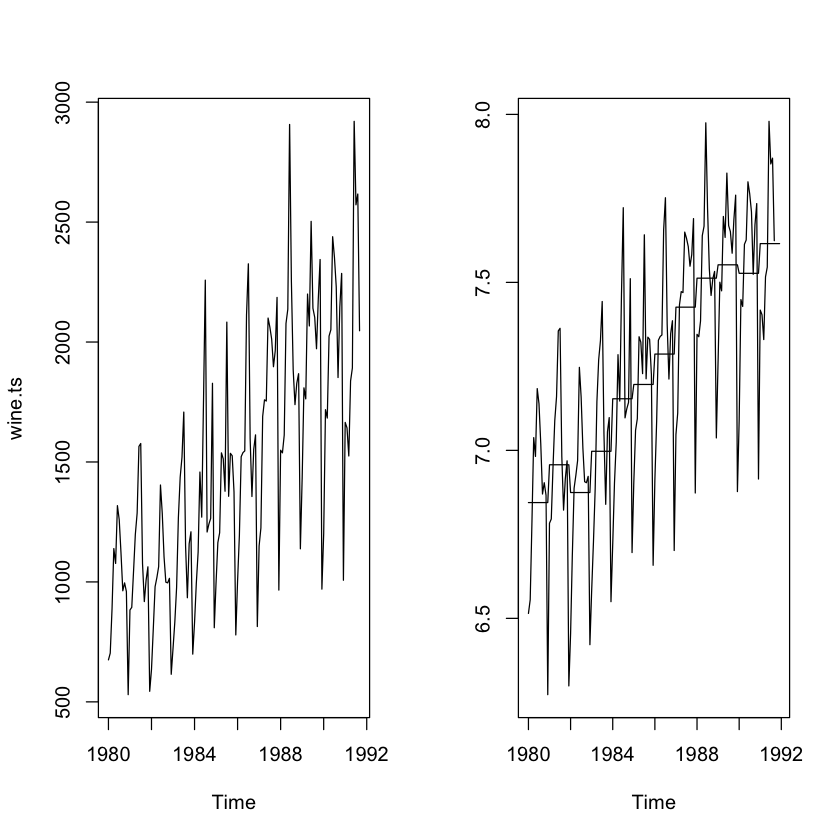

In [61]:
# remove those white spaces
df <- data.frame(lapply(wine, trimws), stringsAsFactors = FALSE)
# obtain the column
a <- df$V1
# convert characters into numerics to extract valid numerics
b <- as.numeric(a)
# remove NA valus
wine <- data.frame(b[!is.na(b)])
colnames(wine) <- 'value'
wine.ts = ts(wine, start=1980, frequency = 12)
t = 1:length(wine.ts)

# create another column log-value
wine['log'] = log(wine$value)
wine.log.ts <- ts(wine['log'], start=1980, frequency = 12)

# calculate yearly averages
m_j=tapply(wine.log.ts,floor(time(wine.log.ts)),mean)
m_j=ts(rep(m_j,each=12),start=1980,frequency = 12)

par(mfrow=c(1,2))
ts.plot(wine.ts)
ts.plot(wine.log.ts, m_j)

Figure 1.11

The detrended log series (left), the estimated seasonal component (center) and the corresponding
residuals series (right) of the Australian red wine sales data.

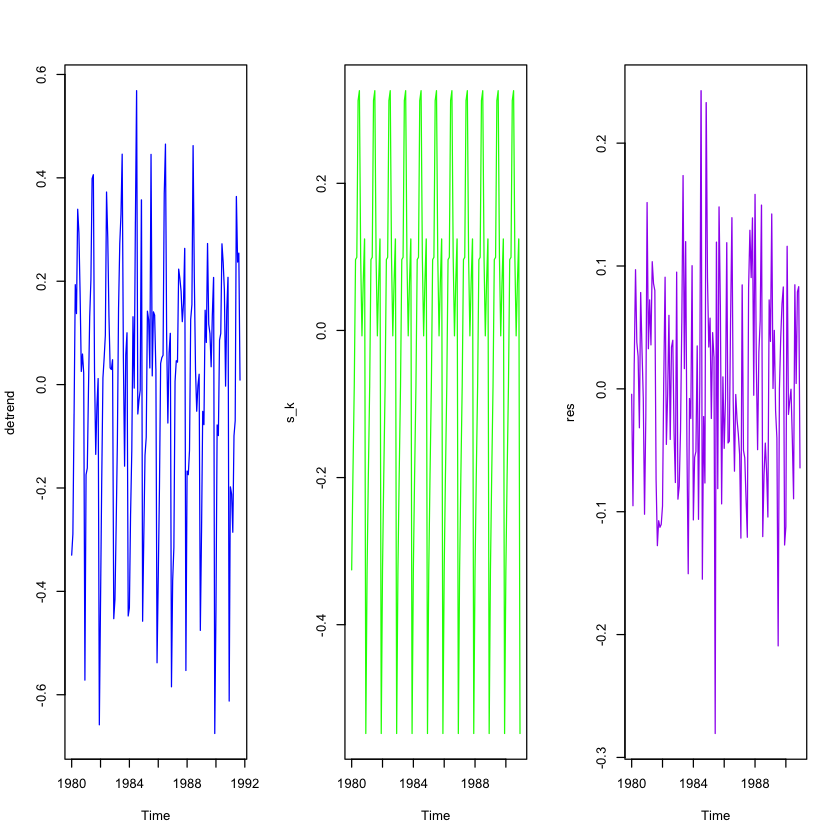

In [62]:
# obtain detrended data
detrend = wine.log.ts - m_j

# estimated seasonal component
s_k=tapply(detrend,cycle(wine.log.ts),mean)
s_k=ts(rep(s_k,times=11),start=1980,frequency = 12)

# calcualte residuals
res=detrend-s_k

par(mfrow=c(1,3))
ts.plot(detrend,col="blue")
ts.plot(s_k,col="green")
ts.plot(res,col="purple")

Figure 1.12

The differenced observed series $\nabla_{12}x_t$ (left), $\nabla x_t$ (middle) and $\nabla\nabla_{12} x_t = \nabla_{12}\nabla x_t$ (right)
for the Australian red wine sales data.

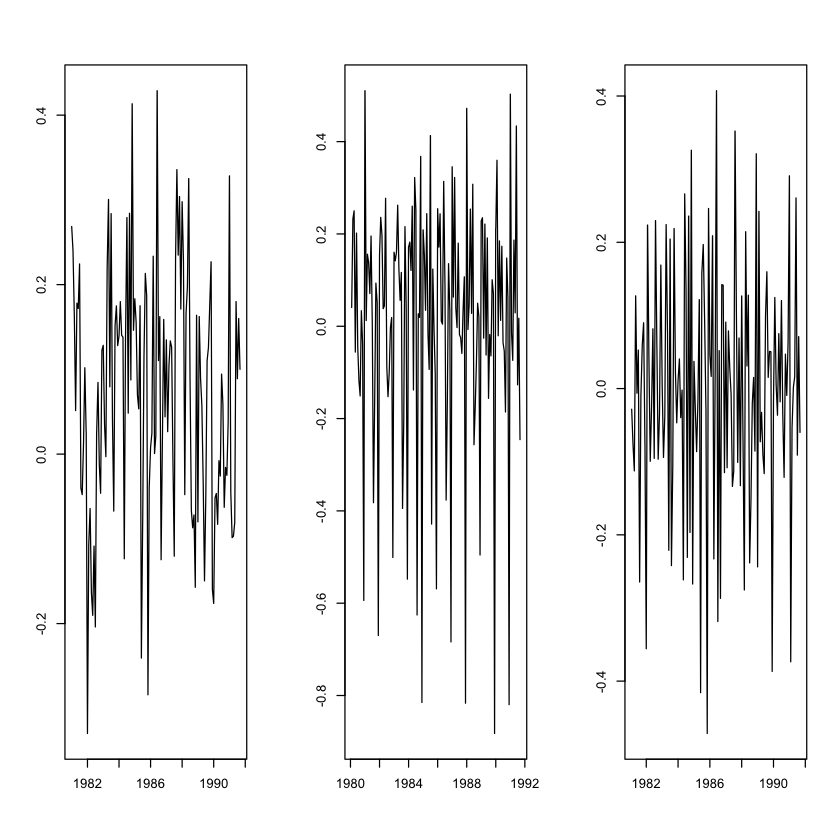

In [64]:
d12 = diff(wine.log.ts, lag=12)
d1 = diff(wine.log.ts)
d12.1 = diff(d12)

par(mfrow=c(1,3))
plot.ts(d12, xlab="", ylab="", type="l")
plot.ts(d1, xlab="", ylab="", type="l")
plot.ts(d12.1, xlab="", ylab="", type="l")

References: 
1. https://www.appsloveworld.com/r/100/291/remove-line-breaks-based-on-delimiter?expand_article=1